In [1]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pandas import read_csv
import math
import seaborn as sns

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [10]:

df1 = pd.read_csv('/content/drive/MyDrive/NN-Jan2022/recon.csv')
df2 = pd.read_csv('/content/drive/MyDrive/NN-Jan2022/labels.csv')

X = df1.values
y = df2.values

n = 49985

X = np.reshape(X, (n,13,21))

In [11]:
#note: labels.csv has 11 columns; you need to drop the column you don't want, and then adjust number of outputs in your NN

#df2.head()
#df2.drop('x-entry', axis=1, inplace=True)
#df2.drop('y-entry', axis=1, inplace=True)
#df2.drop('z-entry', axis=1, inplace=True)
df2.drop('n_x', axis=1, inplace=True)
df2.drop('n_y', axis=1, inplace=True)
df2.drop('n_z', axis=1, inplace=True)
df2.drop('number_eh_pairs', axis=1, inplace=True)
df2.drop('spherR', axis=1, inplace=True)
#df2.drop('theta', axis=1, inplace=True)
#df2.drop('phi', axis=1, inplace=True)
df2.drop('cosPhi', axis=1, inplace=True)
print(df2.head())
#df2.shape

#reset y since you dropped columns
y = df2.values

      x-entry   y-entry  z-entry      theta         phi
0  326.400238  2.956844      0.0  81.526621 -179.033077
1  -96.487137  6.297313      0.0  61.721633   -1.228628
2  224.482834 -7.186841      0.0  77.357507  177.376379
3   56.857647 -1.071598      0.0  42.232569  170.850583
4   -0.926316  6.759004      0.0  27.016447  -17.676475


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'theta (true)')

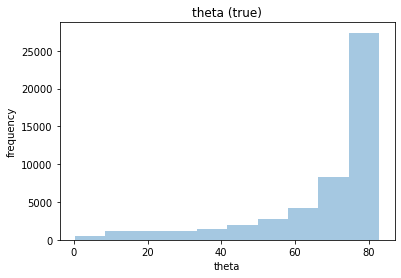

In [45]:
#histo. of true theta values
df_true_theta = pd.DataFrame(df2, columns=['theta'])
sns.distplot(df_true_theta['theta'], kde=False, bins=10)
plt.xlabel('theta')
plt.ylabel('frequency')
plt.title("theta (true)")

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'phi (true)')

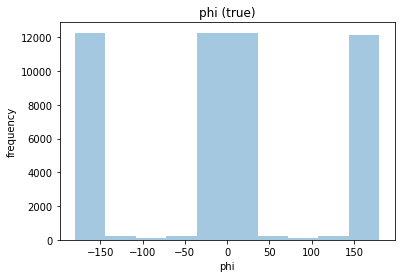

In [47]:
df_true_phi = pd.DataFrame(df2, columns=['phi'])
sns.distplot(df_true_phi['phi'], kde=False, bins=10)
plt.xlabel('phi')
plt.ylabel('frequency')
plt.title("phi (true)")

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'x-entry (true)')

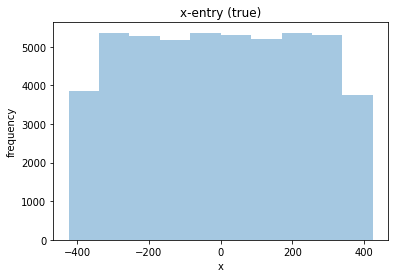

In [51]:
df_true_phi = pd.DataFrame(df2, columns=['x-entry'])
sns.distplot(df_true_phi['x-entry'], kde=False, bins=10)
plt.xlabel('x')
plt.ylabel('frequency')
plt.title("x-entry (true)")

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'y-entry (true)')

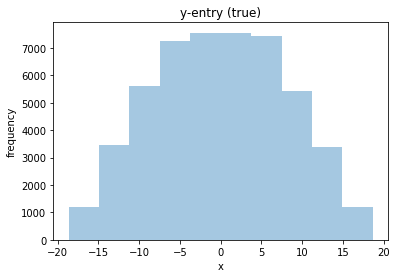

In [52]:
df_true_phi = pd.DataFrame(df2, columns=['y-entry'])
sns.distplot(df_true_phi['y-entry'], kde=False, bins=10)
plt.xlabel('x')
plt.ylabel('frequency')
plt.title("y-entry (true)")

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'z-entry (true)')

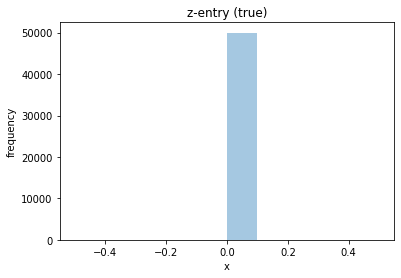

In [53]:
df_true_phi = pd.DataFrame(df2, columns=['z-entry'])
sns.distplot(df_true_phi['z-entry'], kde=False, bins=10)
plt.xlabel('x')
plt.ylabel('frequency')
plt.title("z-entry (true)")

In [32]:
#from https://keras.io/guides/writing_your_own_callbacks/
class CustomCallback(keras.callbacks.Callback):
    def on_train_begin(self, logs=None):
        keys = list(logs.keys())
        print("Starting training; got log keys: {}".format(keys))

    def on_train_end(self, logs=None):
        keys = list(logs.keys())
        print("Stop training; got log keys: {}".format(keys))

    def on_epoch_begin(self, epoch, logs=None):
        keys = list(logs.keys())
        print("Start epoch {} of training; got log keys: {}".format(epoch, keys))

    def on_epoch_end(self, epoch, logs=None):
        keys = list(logs.keys())
        print("End epoch {} of training; got log keys: {}".format(epoch, keys))

    def on_test_begin(self, logs=None):
        keys = list(logs.keys())
        print("Start testing; got log keys: {}".format(keys))

    def on_test_end(self, logs=None):
        keys = list(logs.keys())
        print("Stop testing; got log keys: {}".format(keys))

    def on_predict_begin(self, logs=None):
        keys = list(logs.keys())
        print("Start predicting; got log keys: {}".format(keys))

    def on_predict_end(self, logs=None):
        keys = list(logs.keys())
        print("Stop predicting; got log keys: {}".format(keys))

    def on_train_batch_begin(self, batch, logs=None):
        keys = list(logs.keys())
        print("...Training: start of batch {}; got log keys: {}".format(batch, keys))

    def on_train_batch_end(self, batch, logs=None):
        keys = list(logs.keys())
        print("...Training: end of batch {}; got log keys: {}".format(batch, keys))

    def on_test_batch_begin(self, batch, logs=None):
        keys = list(logs.keys())
        print("...Evaluating: start of batch {}; got log keys: {}".format(batch, keys))

    def on_test_batch_end(self, batch, logs=None):
        keys = list(logs.keys())
        print("...Evaluating: end of batch {}; got log keys: {}".format(batch, keys))

   # def on_predict_batch_begin(self, batch, logs=None):
    #    keys = list(logs.keys())
     #   print("...Predicting: start of batch {}; got log keys: {}".format(batch, keys))

#    def on_predict_batch_end(self, batch, logs=None):
 #       keys = list(logs.keys())
  #      print("...Predicting: end of batch {}; got log keys: {}".format(batch, keys))

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.20, random_state = 0)
print(X.shape, y.shape)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

#scale input data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train.reshape(-1, X_train.shape[-1])).reshape(X_train.shape)
X_test = scaler.transform(X_test.reshape(-1, X_test.shape[-1])).reshape(X_test.shape)

#make a simple model
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(13, 21, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.5))
#change the #nodes in layer below based on number of outputs #*****************
model.add(layers.Dense(5, activation='linear'))

model.summary()


(49985, 13, 21) (49985, 5)
(39988, 13, 21) (9997, 13, 21) (39988, 5) (9997, 5)
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 11, 19, 32)        320       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 9, 32)         0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 3, 7, 64)          18496     
                                                                 
 flatten_3 (Flatten)         (None, 1344)              0         
                                                                 
 dense_6 (Dense)             (None, 64)                86080     
                                                                 
 dropout_3 (Dropout)         (None, 64)  

In [57]:
#https://keras.io/guides/writing_your_own_callbacks/
class LossAndErrorPrintingCallback(keras.callbacks.Callback):
  #***uncomment lines below if you want more detailed logs on each batch*******
   # def on_train_batch_end(self, batch, logs=None):
    #    print(
     #       "Up to batch {}, the average loss is {:7.2f}.".format(batch, logs["loss"])
     #   )

    #def on_test_batch_end(self, batch, logs=None):
     #   print(
     #       "Up to batch {}, the average loss is {:7.2f}.".format(batch, logs["loss"])
     #   )

    def on_epoch_end(self, epoch, logs=None):
        print(
            "The average loss for epoch {} is {:7.2f} "
            "and mean squared error is {:7.2f}.".format(
                epoch, logs["loss"], logs["mean_squared_error"]
            )
        )


In [67]:
batch_size = 64
epochs = 200

model.compile(loss=keras.losses.MeanSquaredError(),
              optimizer='adam',
              metrics=['mean_squared_error'])

history = model.fit(
          X_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, y_test),
          callbacks=[LossAndErrorPrintingCallback()],)

res = model.evaluate(
    X_test, y_test, batch_size=batch_size,
)

predictions = model.predict(X_test, batch_size=batch_size, callbacks=[CustomCallback()])

Epoch 1/200
625/625 [==============================] - 12s 19ms/step - loss: 1186.8925 - mean_squared_error: 1186.8925 - val_loss: 474.5409 - val_mean_squared_error: 474.5409
Epoch 2/200
625/625 [==============================] - 12s 19ms/step - loss: 1182.8101 - mean_squared_error: 1182.8101 - val_loss: 475.9523 - val_mean_squared_error: 475.9523
Epoch 3/200
625/625 [==============================] - 11s 18ms/step - loss: 1169.6552 - mean_squared_error: 1169.6552 - val_loss: 448.4358 - val_mean_squared_error: 448.4358
Epoch 4/200
625/625 [==============================] - 12s 19ms/step - loss: 1168.8684 - mean_squared_error: 1168.8684 - val_loss: 450.7580 - val_mean_squared_error: 450.7580
Epoch 5/200
625/625 [==============================] - 11s 18ms/step - loss: 1166.7258 - mean_squared_error: 1166.7258 - val_loss: 460.0456 - val_mean_squared_error: 460.0456
Epoch 6/200
625/625 [==============================] - 11s 18ms/step - loss: 1183.2828 - mean_squared_error: 1183.2828 - val_

9997
         x_entry   y_entry   z_entry      theta         phi
0     181.563553 -5.062657  0.000024  66.443039  152.428421
1     -94.911476  0.094327 -0.000050  59.661079    0.525064
2    -105.526985  0.053682 -0.000112  60.424171    0.718598
3      98.424034  4.614394 -0.000172  58.276924 -130.253738
4      22.814211 -4.421422 -0.000173  42.691990  116.608337
...          ...       ...       ...        ...         ...
9992  172.178787  4.433176 -0.000028  66.337967 -123.264755
9993  304.400208 -6.174856  0.000204  78.876022  184.052185
9994  211.677750  5.374421  0.000005  70.030647 -145.860001
9995 -189.334183  0.338974 -0.000017  70.463776    0.393567
9996  232.287369  3.543963  0.000082  73.048859 -100.295052

[9997 rows x 5 columns]


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'theta (predicted)')

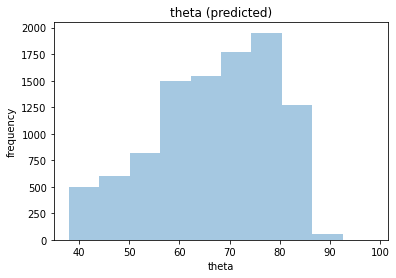

In [68]:
print(len(predictions))
df_predict = pd.DataFrame(predictions, columns=['x_entry', 'y_entry', 'z_entry', 'theta', 'phi'])
print(df_predict)
df_predict.head()
sns.distplot(df_predict['theta'], kde=False, bins=10)
plt.xlabel('theta')
plt.ylabel('frequency')
plt.title("theta (predicted)")

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'phi (predicted)')

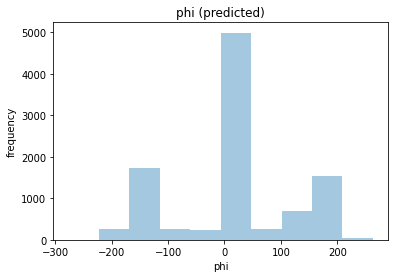

In [69]:
sns.distplot(df_predict['phi'], kde=False, bins=10)
plt.xlabel('phi')
plt.ylabel('frequency')
plt.title("phi (predicted)")

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'x_entry (predicted)')

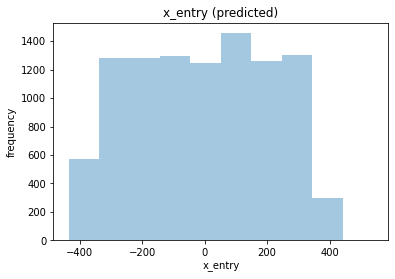

In [70]:
sns.distplot(df_predict['x_entry'], kde=False, bins=10)
plt.xlabel('x_entry')
plt.ylabel('frequency')
plt.title("x_entry (predicted)")

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'y_entry (predicted)')

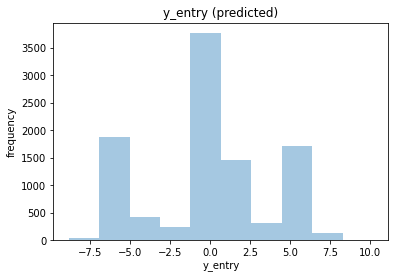

In [71]:
sns.distplot(df_predict['y_entry'], kde=False, bins=10)
plt.xlabel('y_entry')
plt.ylabel('frequency')
plt.title("y_entry (predicted)")

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'z_entry (predicted)')

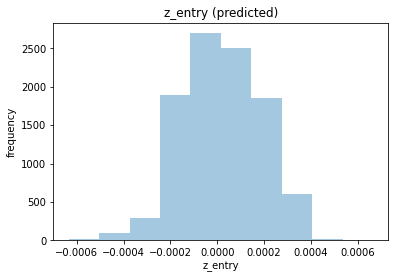

In [72]:
sns.distplot(df_predict['z_entry'], kde=False, bins=10)
plt.xlabel('z_entry')
plt.ylabel('frequency')
plt.title("z_entry (predicted)")

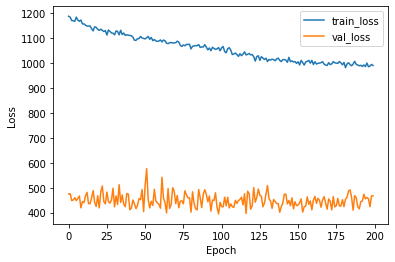

In [73]:
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')


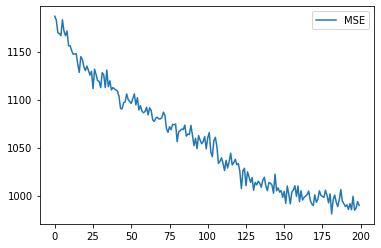

In [74]:
plt.plot(history.history['mean_squared_error'], label='MSE')
plt.legend(loc='upper right')